In [2]:
from matplotlib import pyplot as plt
import numpy as np
import scipy

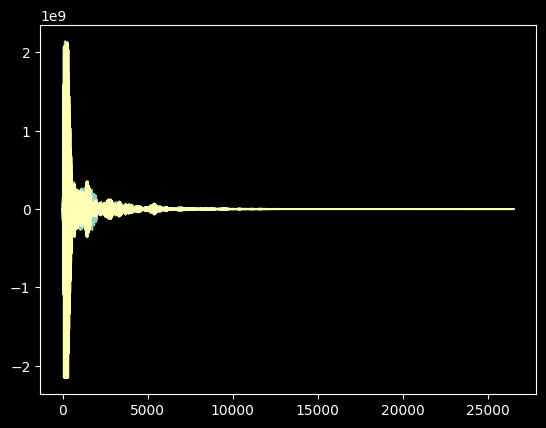

In [32]:
sample_rate, wave_orig = scipy.io.wavfile.read('click.wav')
# wave_orig = np.mean(wave_orig, axis=1) # convert stereo to mono
wave_orig = wave_orig / np.max(np.abs(wave_orig)) # normalize
wave = np.int32(wave_orig * 2**31) # convert to 32-bit integer
plt.plot(wave)

In [36]:
# generate c header file

with open('click2.h', 'w') as f:
	f.write('#pragma once\n')
	f.write('const int32_t click_length = ' + str(len(wave)) + ';\n')
	f.write('const int32_t click[] = {')
	for i in range(len(wave)):
		f.write(str(wave[i]))
		if i < len(wave) - 1:
			f.write(',')
	f.write('};')
	

In [28]:
sample_rate = 44100

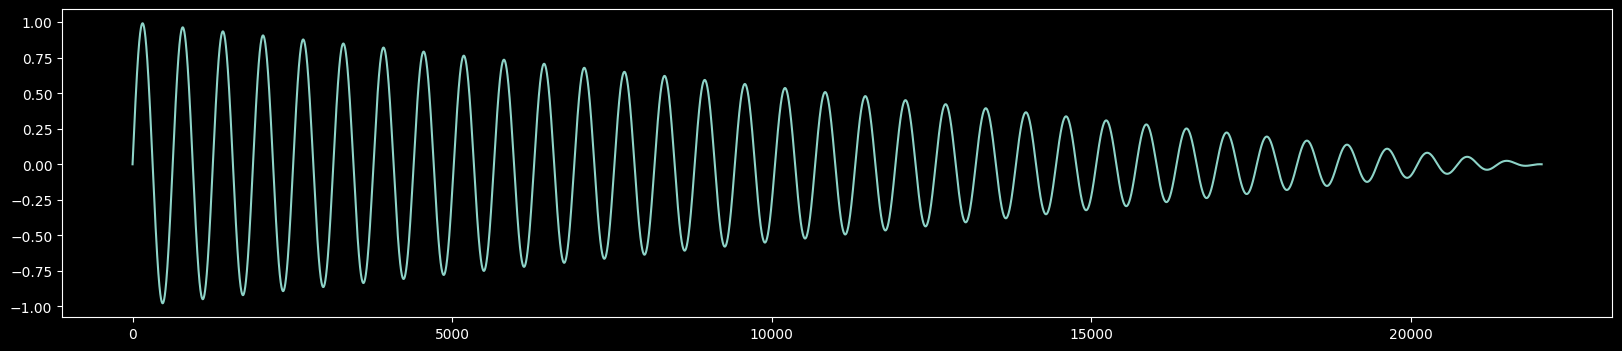

In [33]:
t = np.arange(0, sample_rate//2)
bong_wave = (np.sin(t/100))*(1-t/(sample_rate//2))
plt.figure(figsize=(20, 4))
plt.plot(bong_wave)

In [34]:
from IPython.display import Audio
Audio(bong_wave, rate=sample_rate)

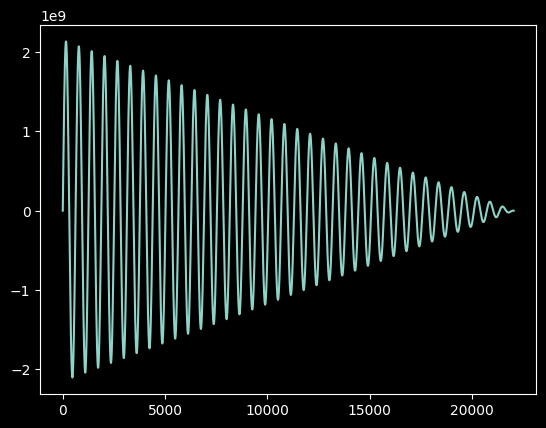

In [35]:
wave = np.int32(bong_wave * 2**31)
plt.plot(wave)